In [27]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import random
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

In [28]:
# show_train_history function
def show_train_history(train_history, train, validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train History')
  plt.ylabel(train)
  plt.xlabel('Epoch')
  plt.legend(['train', 'validation'], loc ='upper left')
  plt.show()

In [29]:
random.seed(18)

In [30]:
path = '/content/drive/MyDrive/LangTech/ML/ex03'

In [31]:
# MNIST dataset parameters.
num_classes = 10 # total classes (0-9 digits).
num_features = 784 # data features (img shape: 28*28).

# Training parameters.
learning_rate = 0.001
training_steps = 3000
batch_size = 256
display_step = 100

# Network parameters.
n_hidden_1 = 256 # 1st layer number of neurons.
n_hidden_2 = 128 # 2nd layer number of neurons.

In [32]:
# Prepare MNIST data.
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Convert to float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.

We start making a little processing of our data (e.g. reshaping their size) in order to be able to use them as needed for each model.

**Artificial Neural Network**

In order to create a fully connected custom Artificial Neural Network (ANN), we have to define the neurons for each layer, as well as the activation function.

In [33]:
ann = models.Sequential([
  layers.Dense(256, activation='relu', input_shape=(784,)),
  layers.Dense(128, activation='relu'),
  layers.Dense(10, activation='softmax')])

In [34]:
path = '/content/drive/MyDrive/LangTech/ML/ex03'

Afterwards, we compile our model based on the given requirements.

In [35]:
ann.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
# define callbacks in order to save the model with the best weights in a file
# and use EarlyStopping in order to set a stopping point for the model once
# its performance remains the same for a certain number of epochs.
callbacks = [ModelCheckpoint(path+'checkpoint.ann.keras', monitor='val_loss', save_best_only=True, verbose=1),
             EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)]

In [36]:
history_ann = ann.fit(
  x_train,
  to_categorical(y_train),
  epochs=20,
  validation_split=0.1,
  callbacks=callbacks
)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8850 - loss: 0.3902
Epoch 1: val_loss improved from inf to 0.09778, saving model to /content/drive/MyDrive/LangTech/ML/ex03checkpoint.ann.keras
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8851 - loss: 0.3901 - val_accuracy: 0.9715 - val_loss: 0.0978
Epoch 2/20
1672/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9723 - loss: 0.0898
Epoch 2: val_loss improved from 0.09778 to 0.08544, saving model to /content/drive/MyDrive/LangTech/ML/ex03checkpoint.ann.keras
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9723 - loss: 0.0898 - val_accuracy: 0.9738 - val_loss: 0.0854
Epoch 3/20
1673/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9815 - loss: 0.0571
Epoch 3: val_loss improved from 0.08544 to 0.08374, saving model to /content/drive/MyDrive/LangTech/ML/ex03checkpoint.ann.keras
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9815 - loss: 0.0571 - val_accuracy: 0.9763 - val_loss: 0.0837

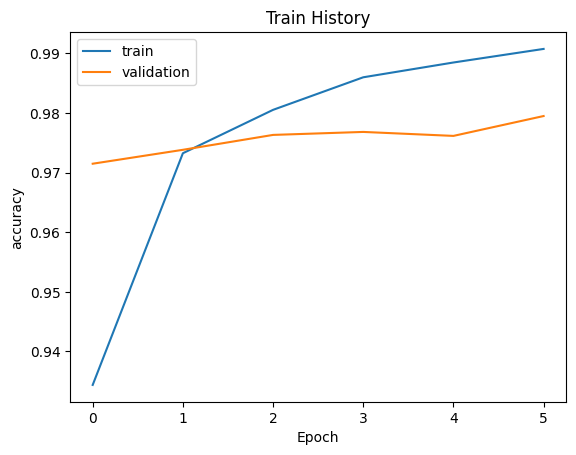

In [37]:
show_train_history(history_ann, 'accuracy', 'val_accuracy')

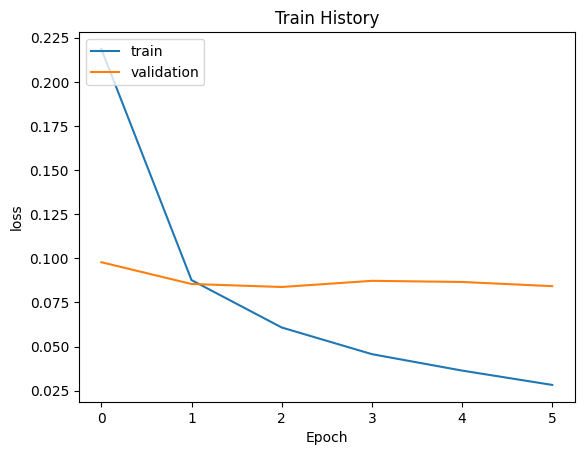

In [38]:
show_train_history(history_ann, 'loss', 'val_loss')

From the plots created above, we can "justify" the reason why EarlyStopping chose the 3rd epoch as best.

Taking both images into account, we can see that, in epoch 3, our model achieves the most dramatic improvement in performance (accuracy and loss) regarding solely train set.

However, validation set, had a sudden drop in performance in both cases mentioned above. This remains an optimal stopping point for the model, since training for more epochs, seems as a non-optimal solution for the model.

**Convolutional Neural Network**

In [39]:
# Prepare MNIST data.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Convert to float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Flatten images to 1-D vector of 784 features (28*28).
# ==== x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.

In [40]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [42]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

callbacks = [ModelCheckpoint(path+'checkpoint.cnn.keras', monitor='val_loss', save_best_only=True, verbose=1),
             EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)]

# variable callbacks contains 'patience', which is the number of epochs having
# only a small variation in performance. When the given number of epochs with same performance
# is met, fit stops

In [43]:
history_cnn = model.fit(x_train, y_train, epochs=20, validation_split=0.1, callbacks=callbacks)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9024 - loss: 0.3219
Epoch 1: val_loss improved from inf to 0.04550, saving model to /content/drive/MyDrive/LangTech/ML/ex03checkpoint.cnn.keras
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9024 - loss: 0.3218 - val_accuracy: 0.9883 - val_loss: 0.0455
Epoch 2/20
1674/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9855 - loss: 0.0478
Epoch 2: val_loss improved from 0.04550 to 0.03889, saving model to /content/drive/MyDrive/LangTech/ML/ex03checkpoint.cnn.keras
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9855 - loss: 0.0478 - val_accuracy: 0.9900 - val_loss: 0.0389
Epoch 3/20
1678/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9900 - loss: 0.0315
Epoch 3: val_loss did not improve from 0.03889
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9900 - loss: 0.0315 - val_accuracy: 0.9903 - val_loss: 0.0400
Epoch 4/20
1676/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9935 - loss: 0.0217
E

**Metrics**

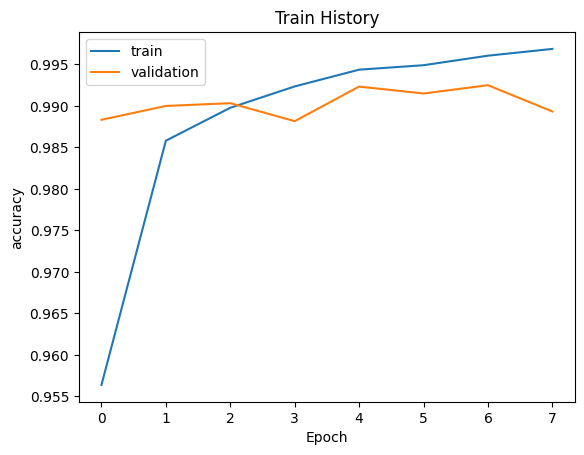

In [44]:
# Call the function using these arguments
show_train_history(history_cnn, 'accuracy', 'val_accuracy')

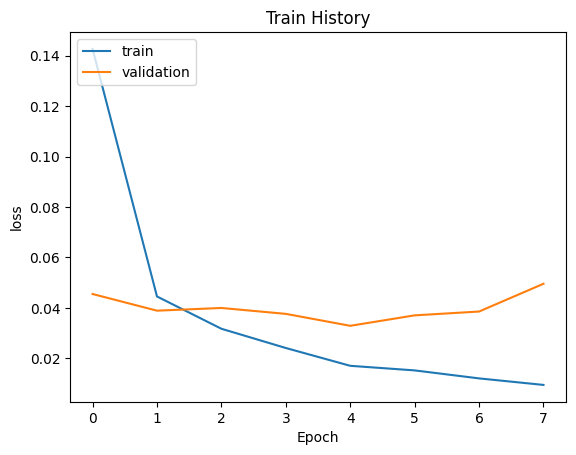

In [45]:
show_train_history(history_cnn, 'loss', 'val_loss')

Convolutional Neural Network (CNN) seems to perform in a manner similar to Artificial Neural Network; there is a reasonable variation between train and test sets and the first significant observation happens around the 5th epoch of training.

Regarding variations of the two sets, we witness similar curves as the ones we had with ANN. It is worth noting that variations on CNN are smaller compared to ANN.

#**Evaluation**

To further investigate our results, we plot the confusion matrices for each trained model.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


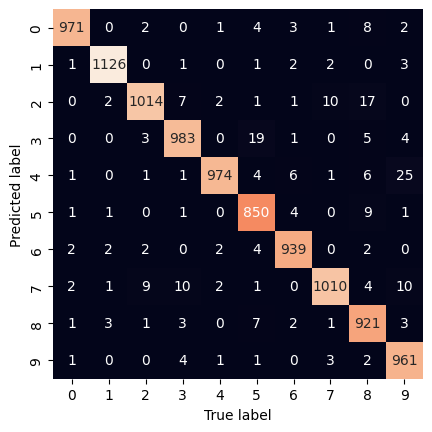

In [46]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


x_test = x_test.reshape([-1, num_features])
y_pred = np.argmax(ann.predict(x_test), axis=1)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.arange(10),
            yticklabels=np.arange(10))
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


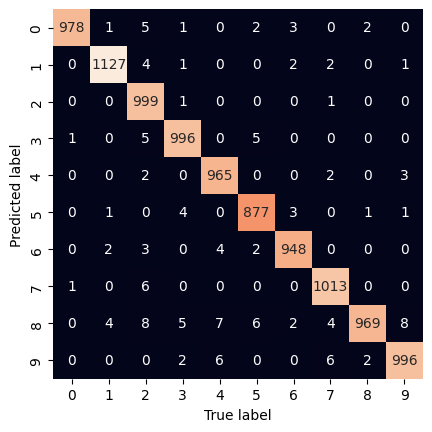

In [47]:
_, (x_test, _) = mnist.load_data()
y_pred = np.argmax(model.predict(x_test), axis=1)

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.arange(10),
            yticklabels=np.arange(10))
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

**Conclusion**

Overall, both models had a great performance. Fitting started achieving a great performance from the very 1st epoch

(ANN:accuracy: 0.8821 - loss: 0.3952 - val_accuracy: 0.9692 - val_loss: 0.1022,

CNN:accuracy: 0.8927 - loss: 0.3340 - val_accuracy: 0.9848 - val_loss: 0.0548)

and kept improving until the 3rd. Using EarlyStopping, we managed to stop training before we get to witness any unwanted results.

As mentioned above, validation set seemed to perform "worse" than train set around the 3rd epoch. Even though this is not a clear sign, we can suggest that this happened due to overfitting, because both models had a great start with high accuracy and low loss, but around the 3rd epoch this started to change.

Using "EarlyStopping", we set the argument "patience" (which shows the number of epochs to continue training after improvement stops) to 3, showing some "tolerance" to this stop.

Regarding the confusion matrix, we can see that the results are quite good as well. We observe most instances concentrated diagonally (as they should have), depicting the true positive results. We also observe some false positive instances, but those are just the errors that we also observed in the other metrics too.

All evaluation metrics used in this notebook (accuracy, loss and confusion matrix) show that both models fitted MNIST dataset successfully, trained for only a few epochs (3 and 5, ANN and CNN respectively) and achieved great scores. If we compare the models, we see that - with small variations in performance - CNN performed better than ANN, because it provided better results in each metric used.